# # Neural Network Basics and Word2Vec
AU 16 CSE 5539-0010 "Social Media and Text Analysis" Homework #3  
Wei Xu, The Ohio State University   

In this assignment, we will walk you through the process of implementing: 

- A softmax function and a sigmoid function
- A simple neural network with back propagation
- Word2vec models (Skip-gram, CBOW) with negative sampling

and training your own word vectors with stochastic gradient descent (SGD). The purpose of this assignment is to familiarize you with basic knowledge about neural networks and help you gain proficiency in writing efficient, vectorized code.

You may find this **[documentation](http://cs224d.stanford.edu/assignment1/assignment1_soln)** very helpful, as it will walk you through all the math needed for this assignment.

<div class="alert alert-danger">
IMPORTANG: In this assignment, except Numpy and Matplotlib, no other external Python packages are allowed. Scipy is used in gradient checking, though, it is not allowed elsewhere. Please don't add or remove any code cells, as it might break our automatic grading system and affect your grade.
</div>

**Honor Code:** I hereby agree to abide the Ohio State University's Code of Student Conduct, promise that the submitted assignment is my own work, and understand that my code is subject to plagiarism test.

**Signature**: *(Peddamail Jayavardhan Reddy)*

In [1]:
# Run some setup code for this notebook. Don't modify anything in this cell.

import random
import numpy as np
from data_utils import *
import matplotlib.pyplot as plt
from scipy.special import expit

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## 1. Neural Network Basics [Bonus 5 Points]

In this part, you're going to implement

* A softmax function
* A sigmoid activation function and its gradient
* A forward propagation for a simple neural network with cross-entropy cost
* A backward propagation algorithm to compute gradients for the parameters
* Gradient checking

### 1.1 Softmax

The softmax function is defined as $softmax(\mathbf{x})_i = \frac{e^{x_i}}{\sum_{j}{e^{x_j}}}$. 


And conveniently, softmax is invarint to constant offsets in the input, that is, for any input vector $\mathbf{x}$ and any constant $c$, $softmax(\mathbf{x})=softmax(\mathbf{x}+c)$, where $\mathbf{x}+c$ means adding the constant $c$ to every dimension of $\mathbf{x}$. 

**Show your efficient implementation of the softmax function in Python below. The computional efficienicy is crucial because this function will be used frequently in later code. ** 

You will find numpy functions np.exp, np.sum, np.reshape, np.max, and [numpy broadcasting](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) useful. Numpy is a Python package for scientific programming. You can find a nice **Numpy tutoral** [here](http://cs231n.github.io/python-numpy-tutorial/).


Given an input matrix of *N* rows and *d* columns, compute the softmax prediction for each row. That is, when the input is

    [[1,2],
    [3,4]]
    
the output of your functions should be

    [[0.2689, 0.7311],
    [0.2689, 0.7311]]

In [2]:
def softmax(x):
    """ Softmax function """
    ###################################################################
    # Compute the softmax function for the input here.                #
    # It is crucial that this function is optimized for speed because #
    # it will be used frequently in later code.                       #
    # You might find numpy functions np.exp, np.sum, np.reshape,      #
    # np.max, and numpy broadcasting useful for this task. (numpy     #
    # broadcasting documentation:                                     #
    # http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)  #
    # You should also make sure that your code works for one          #
    # dimensional inputs (treat the vector as a row), you might find  #
    # it helpful for your later problems.                             #
    ###################################################################
    
    ### YOUR CODE HERE
    X_=np.atleast_2d(x)
    X_ -= np.max(X_,axis=1).reshape(-1,1)    
    X_ = np.exp(X_)
    X_ /= np.sum(X_,axis=1).reshape(-1,1)
    
    if len(x.shape)==1: 
        x = X_.flatten()
    else:
        x = X_
    
    ### END YOUR CODE
    
    return x

In [3]:
# Verify your softmax implementation
print ("=== For autograder ===")
print (softmax(np.array([[1001,1002],[3,4]])))
print (softmax(np.array([[-1001,-1002]])))

=== For autograder ===
[[ 0.26894142  0.73105858]
 [ 0.26894142  0.73105858]]
[[ 0.73105858  0.26894142]]


### 1.2 Sigmoid 

The sigmoid function is defined as $sigmoid(\mathbf{x})_i = \frac{1}{1+{e^{-x_i}}}$


In [4]:
#Remove math import depending on piazza answer
def sigmoid(x):
    """ Sigmoid function """
    ###################################################################
    # Compute the sigmoid function for the input here.                #
    ###################################################################
    
    ### YOUR CODE HERE
    #The largest value representable by a numpy float64 is 1.7976931348623157e+308, 
    #whose logarithm is about 709.782712893384
    #So, we clip all values<-709.782712893384 to -709.782712893384
    
     #The least value(>0) representable by a numpy float64 is 2.2204460492503131e-16, 
    #whose logarithm is about -36.04365338911715
    #So, we clip all values>36.04365338911715 to 36.04365338911715
    
    
    #largest_float64=math.log(np.finfo(np.float64).max)
    #least_value_greater_zero=math.log(np.finfo(np.float64).eps)
    
    largest_float64=709.782712893384
    least_value_greater_zero=-36.04365338911715
    y=np.clip(x,-1*largest_float64,-1*least_value_greater_zero)
    x=1/(1+np.exp(-1*y))
    ### END YOUR CODE
    
    return x

def sigmoid_grad(f):
    """ Sigmoid gradient function """
    ###################################################################
    # Compute the gradient for the sigmoid function here. Note that   #
    # for this implementation, the input f should be the sigmoid      #
    # function value of your original input x.                        #
    ###################################################################
    
    ### YOUR CODE HERE
    y=np.multiply(f,(1-f))



    ### END YOUR CODE
    return y

In [5]:
# Check your sigmoid implementation
x = np.array([[1, 2], [-1, -2]])
f = sigmoid(x)
g = sigmoid_grad(f)
print ("=== For autograder ===")
print (f)
print (g)

=== For autograder ===
[[ 0.73105858  0.88079708]
 [ 0.26894142  0.11920292]]
[[ 0.19661193  0.10499359]
 [ 0.19661193  0.10499359]]


### 1.3 Gradient Checking

[Gradient checking](http://ufldl.stanford.edu/tutorial/supervised/DebuggingGradientChecking/) is an important technique for debugging the gradient computation. Logistic regression is a relatively simple algorithm where it is straightforward to derive and implement its cost function and gradient computation. For more complex models, the gradient computaitn can be notoriously difficulty to debug and get right. Sometimes a subtly buggy implementation will manage to learn something that can look surprisingly reasonable, while performing less well than a correct implementation. Thus, even with a buggy implementation, it may not at all be apparent that anything is amiss. 

In [6]:
# First implement a gradient checker by filling in the following functions
def gradcheck_naive(f, x):
    """ 
    Gradient check for a function f 
    - f should be a function that takes a single argument and outputs the cost and its gradients
    - x is the point (numpy array) to check the gradient at
    """ 

    rndstate = random.getstate()
    random.setstate(rndstate)  
    fx, grad = f(x) # Evaluate function value at original point
    h = 1e-4

    # Iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index

        ### try modifying x[ix] with h defined above to compute numerical gradients
        ### make sure you call random.setstate(rndstate) before calling f(x) each time, this will make it 
        ### possible to test cost functions with built in randomness later
        ### YOUR CODE HERE:

        e=x.astype('float64')
        e[ix]+=h
        random.setstate(rndstate)
        f_plus_epsilon,grad_plus=f(e)
        e[ix]-=2.0*h
        random.setstate(rndstate)
        f_minus_epsilon,grad_minus=f(e)
        numgrad=(f_plus_epsilon-f_minus_epsilon)/(2*h)
    
        ### END YOUR CODE

        # Compare gradients
        reldiff = abs(numgrad - grad[ix]) / max(1, abs(numgrad), abs(grad[ix]))
        if reldiff > 1e-5:
            print ("Gradient check failed.")
            print ("First gradient error found at index %s" % str(ix))
            print ("Your gradient: %f \t Numerical gradient: %f" % (grad[ix], numgrad))
            return
    
        it.iternext() # Step to next dimension

    print ("Gradient check passed!")

In [7]:
# Sanity check for the gradient checker
quad = lambda x: (np.sum(x ** 2), x * 2)

print ("=== For autograder ===")
gradcheck_naive(quad, np.array(123.456))      # scalar test
gradcheck_naive(quad, np.random.randn(3,))    # 1-D test
gradcheck_naive(quad, np.random.randn(4,5))   # 2-D test

=== For autograder ===
Gradient check passed!
Gradient check passed!
Gradient check passed!


### 1.4 Back Propagation

Now, use the functions you just implemented, fill in the following functions to implement a neural network with one sigmoid hidden layer. You may skip this 1.4 section, and implement the word2vec below directly. 

In [8]:
# Set up fake data and parameters for testing the neural network
N = 20
dimensions = [10, 5, 10]
data = np.random.randn(N, dimensions[0])   # each row will be a datum
labels = np.zeros((N, dimensions[2]))

for i in range(N):
    labels[i,random.randint(0,dimensions[2]-1)] = 1
params = np.random.randn((dimensions[0] + 1) * dimensions[1] + (dimensions[1] + 1) * dimensions[2], )

In [9]:
def forward_backward_prop(data, labels, params):
    "forward_backward_prop"" Forward and backward propagation for a two-layer sigmoidal network """
    ###################################################################
    # Compute the forward propagation and for the cross entropy cost, #
    # and backward propagation for the gradients for all parameters.  #
    ###################################################################
    
    ### Unpack network parameters (do not modify)
    t = 0
    W1 = np.reshape(params[t:t+dimensions[0]*dimensions[1]], (dimensions[0], dimensions[1])) # (10,5)
    t += dimensions[0]*dimensions[1]
    b1 = np.reshape(params[t:t+dimensions[1]], (1, dimensions[1])) # (1, 5)
    t += dimensions[1]
    W2 = np.reshape(params[t:t+dimensions[1]*dimensions[2]], (dimensions[1], dimensions[2]))  # (5, 10)
    t += dimensions[1]*dimensions[2]
    b2 = np.reshape(params[t:t+dimensions[2]], (1, dimensions[2])) # (1, 10)
    
    ### YOUR CODE HERE: forward propagation (calculate the cost as cross entropy error)
    x=data
    y=labels

    z1=np.dot(x,W1)+b1
    h=sigmoid(z1)
    z2=np.dot(h,W2)+b2
    y_=softmax(z2)
    
    # Calculating the loss
    cost = np.sum(-np.multiply(y,np.log(y_)))
    
    ### END YOUR CODE

    ### YOUR CODE HERE: backward propagation
    delta3=y_-y
    delta2=np.multiply(np.dot(delta3,W2.T),sigmoid_grad(h))
    
    gradW2=np.dot(h.T,delta3)
    gradb2 = np.sum(delta3, axis=0, keepdims=True)
    gradW1=np.dot(x.T,delta2)
    gradb1 = np.sum(delta2, axis=0, keepdims=True)
    ### END YOUR CODE
    
    ### Stack gradients (do not modify)
    grad = np.concatenate((gradW1.flatten(), gradb1.flatten(), gradW2.flatten(), gradb2.flatten()))
    return cost, grad

In [10]:
# Perform gradcheck on your neural network
print ("=== For autograder ===")
gradcheck_naive(lambda params: forward_backward_prop(data, labels, params), params)

=== For autograder ===
Gradient check passed!


## 2. Word2vec [Bonus 15 Points]

In this part you will implement the `word2vec` models and train your own word vectors with stochastic gradient descent (SGD). You may find the following readings helpful:

- [Lecture Note on Skip-gram, CBOW and Negative Sampling](http://cs224d.stanford.edu/lecture_notes/notes1.pdf) by Francois Chaubard, Rohit Mundra, Richard Socher
- [Semantics with Dense Vectors](https://web.stanford.edu/~jurafsky/slp3/16.pdf) (Speech and Language Processing, Chapter 16) by Dan Jurafsky and James H. Martin



In [11]:
# Implement a function that normalizes each row of a matrix to have unit length

def normalizeRows(x):
    """ Row normalization function """
    # Implement a function that normalizes each row of a matrix to have unit length
    
    ### YOUR CODE HERE
    x_norm=np.linalg.norm(x,ord = 2,axis=1,keepdims=True)
    x = x/x_norm
    
    ### END YOUR CODE
    
    return x

# Test this function
print ("=== For autograder ===")
print (normalizeRows(np.array([[3.0,4.0],[1, 2]])))  # the result should be [[0.6, 0.8], [0.4472, 0.8944]]

=== For autograder ===
[[ 0.6         0.8       ]
 [ 0.4472136   0.89442719]]


In [12]:
# Implement your skip-gram and CBOW models here

def softmaxCostAndGradient(predicted, target, outputVectors, dataset):
    """ Softmax cost function for word2vec models """
    
    # Implement the cost and gradients for one predicted word vector  
    # and one target word vector as a building block for word2vec     
    # models, assuming the softmax prediction function and cross      
    # entropy loss.                                                   
    
    # Inputs:                                                         
    # - predicted: numpy ndarray, predicted word vector (\hat{v} in 
    #   the written component or \hat{r} in an earlier version)
    # - target: integer, the index of the target word               
    # - outputVectors: "output" vectors (as rows) for all tokens     
    # - dataset: needed for negative sampling, unused here.         
    
    # Outputs:                                                        
    # - cost: cross entropy cost for the softmax word prediction    
    # - gradPred: the gradient with respect to the predicted word   
    #        vector                                                
    # - grad: the gradient with respect to all the other word        
    #        vectors                                                                                             
    
    ### YOUR CODE HERE
    
    u_c=outputVectors[target]
    y_=softmax(outputVectors.dot(predicted))
    cost=-1.0*np.sum(np.log(y_[target]))
    gradPred=np.sum(y_.reshape(-1,1)*outputVectors, axis=0)-u_c
    grad=y_.reshape(-1,1)*np.tile(predicted,(outputVectors.shape[0],1))
    grad[target] -= predicted
    
    ### END YOUR CODE
    
    return cost, gradPred, grad

def negSamplingCostAndGradient(predicted, target, outputVectors, dataset, 
    K=10):
    """ Negative sampling cost function for word2vec models """

    # Implement the cost and gradients for one predicted word vector  
    # and one target word vector as a building block for word2vec     
    # models, using the negative sampling technique. K is the sample  
    # size. You might want to use dataset.sampleTokenIdx() to sample  
    # a random word index. 
    # 
    # Note: See test_word2vec below for dataset's initialization.
    #                                       
    # Input/Output Specifications: same as softmaxCostAndGradient     
    
    ### YOUR CODE HERE
    
    indices=[None]*K
    for k in range(K):
        randomIndex=dataset.sampleTokenIdx()
        while randomIndex==target:
            randomIndex=dataset.sampleTokenIdx()
        indices[k]=randomIndex
    
    NegSamples=outputVectors[indices].reshape(len(indices),-1)
    u_o=outputVectors[target]
    
    sigmoid1=sigmoid(predicted.dot(u_o))
    sigmoid2=sigmoid(-1.0*NegSamples.dot(predicted))
    
    term1=-1.0*np.log(sigmoid1)
    term2=-1.0*np.sum(np.log(sigmoid2))
    cost=term1+term2
    
    term1=np.sum(sigmoid1)-1.0
    term2=-1.0*np.sum((sigmoid2.reshape(-1,1)-1.0)*NegSamples,axis=0)
    gradPred=term1*u_o+term2
    
    value=-1.0*(sigmoid2.reshape(-1,1)-1.0)
    grad = np.zeros(outputVectors.shape)
    grad[target] +=term1*(predicted)
    np.add.at(grad, indices, value*np.tile(predicted,(K,1)))
    
    ### END YOUR CODE
    
    return cost, gradPred, grad

def skipgram(currentWord, C, contextWords, tokens, inputVectors, outputVectors, 
    dataset, word2vecCostAndGradient = softmaxCostAndGradient):
    """ Skip-gram model in word2vec """

    # Implement the skip-gram model in this function.

    # Inputs:                                                         
    # - currrentWord: a string of the current center word           
    # - C: integer, context size                                    
    # - contextWords: list of no more than 2*C strings, the context words                                               
    # - tokens: a dictionary that maps words to their indices in    
    #      the word vector list                                
    # - inputVectors: "input" word vectors (as rows) for all tokens           
    # - outputVectors: "output" word vectors (as rows) for all tokens         
    # - word2vecCostAndGradient: the cost and gradient function for 
    #      a prediction vector given the target word vectors,  
    #      could be one of the two cost functions you          
    #      implemented above

    # Outputs:                                                        
    # - cost: the cost function value for the skip-gram model       
    # - grad: the gradient with respect to the word vectors         

    ### YOUR CODE HERE
    
    cost = 0.0
    gradIn = np.zeros(inputVectors.shape)
    gradOut = np.zeros(outputVectors.shape)
    
    index_v_c=tokens[currentWord]
    predicted=inputVectors[index_v_c]
    
    for i in contextWords:
        target=tokens[i] 
        cost_,gradPred,grad=word2vecCostAndGradient(predicted,target,outputVectors,dataset)
        gradIn[index_v_c]+=gradPred
        gradOut+=grad
        cost+=cost_
        
    ### END YOUR CODE
    
    return cost, gradIn, gradOut

def cbow(currentWord, C, contextWords, tokens, inputVectors, outputVectors, 
    dataset, word2vecCostAndGradient = softmaxCostAndGradient):
    """ CBOW model in word2vec """

    # Implement the continuous bag-of-words model in this function.            
    # Input/Output specifications: same as the skip-gram model        
    cost = 0
    gradIn = np.zeros(inputVectors.shape)
    gradOut = np.zeros(outputVectors.shape)

    ### YOUR CODE HERE
    context_index=[tokens[contextword] for contextword in contextWords]
    predicted = np.zeros(inputVectors.shape[1])
    for idx in context_index:
        predicted += inputVectors[idx]
        
    target=tokens[currentWord]
    
    cost,gradPred,grad=word2vecCostAndGradient(predicted,target,outputVectors,dataset)
    
    for i in context_index:
        gradIn[i]+=gradPred
        
    gradOut+=grad
    
    ### END YOUR CODE
    
    return cost, gradIn, gradOut

In [13]:
# Gradient check!

def word2vec_sgd_wrapper(word2vecModel, tokens, wordVectors, dataset, C, word2vecCostAndGradient = softmaxCostAndGradient):
    batchsize = 50
    cost = 0.0
    grad = np.zeros(wordVectors.shape)
    N = wordVectors.shape[0]
    inputVectors = wordVectors[:int(N/2),:]
    outputVectors = wordVectors[int(N/2):,:]
    for i in range(batchsize):
        C1 = random.randint(1,C)
        centerword, context = dataset.getRandomContext(C1)
        
        if word2vecModel == skipgram:
            denom = 1
        else:
            denom = 1
        
        c, gin, gout = word2vecModel(centerword, C1, context, tokens, inputVectors, outputVectors, dataset, word2vecCostAndGradient)
        cost += c / batchsize / denom
        grad[:int(N/2), :] += gin / batchsize / denom
        grad[int(N/2):, :] += gout / batchsize / denom
        
    return cost, grad

# Interface to the dataset for negative sampling
dataset = type('dummy', (), {})()
def dummySampleTokenIdx():
    return random.randint(0, 4)

def getRandomContext(C):
    tokens = ["a", "b", "c", "d", "e"]
    return tokens[random.randint(0,4)], [tokens[random.randint(0,4)] for i in range(2*C)]
dataset.sampleTokenIdx = dummySampleTokenIdx
dataset.getRandomContext = getRandomContext

random.seed(31415)
np.random.seed(9265)
dummy_vectors = normalizeRows(np.random.randn(10,3))
dummy_tokens = dict([("a",0), ("b",1), ("c",2),("d",3),("e",4)])
print ("==== Gradient check for skip-gram ====")
gradcheck_naive(lambda vec: word2vec_sgd_wrapper(skipgram, dummy_tokens, vec, dataset, 5), dummy_vectors)
gradcheck_naive(lambda vec: word2vec_sgd_wrapper(skipgram, dummy_tokens, vec, dataset, 5, negSamplingCostAndGradient), dummy_vectors)
print ("\n==== Gradient check for CBOW      ====")
gradcheck_naive(lambda vec: word2vec_sgd_wrapper(cbow, dummy_tokens, vec, dataset, 5), dummy_vectors)
gradcheck_naive(lambda vec: word2vec_sgd_wrapper(cbow, dummy_tokens, vec, dataset, 5, negSamplingCostAndGradient), dummy_vectors)

print ("\n=== Results ===")
print (skipgram("c", 3, ["a", "b", "e", "d", "b", "c"], dummy_tokens, dummy_vectors[:5,:], dummy_vectors[5:,:], dataset))
print (skipgram("c", 1, ["a", "b"], dummy_tokens, dummy_vectors[:5,:], dummy_vectors[5:,:], dataset, negSamplingCostAndGradient))
print (cbow("a", 2, ["a", "b", "c", "a"], dummy_tokens, dummy_vectors[:5,:], dummy_vectors[5:,:], dataset))
print (cbow("a", 2, ["a", "b", "a", "c"], dummy_tokens, dummy_vectors[:5,:], dummy_vectors[5:,:], dataset, negSamplingCostAndGradient))


==== Gradient check for skip-gram ====
Gradient check passed!
Gradient check passed!

==== Gradient check for CBOW      ====
Gradient check passed!
Gradient check passed!

=== Results ===
(11.166109001533981, array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-1.26947339, -1.36873189,  2.45158957],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]]), array([[-0.41045956,  0.18834851,  1.43272264],
       [ 0.38202831, -0.17530219, -1.33348241],
       [ 0.07009355, -0.03216399, -0.24466386],
       [ 0.09472154, -0.04346509, -0.33062865],
       [-0.13638384,  0.06258276,  0.47605228]]))
(14.093692760899629, array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-3.86802836, -1.12713967, -1.52668625],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]]), array([[-0.11265089,  0.05169237,  0.3932116

In [15]:
# Now, implement SGD

# Save parameters every a few SGD iterations as fail-safe
SAVE_PARAMS_EVERY = 1000

import glob
import os.path as op
import pickle

def load_saved_params():
    """ A helper function that loads previously saved parameters and resets iteration start """
    st = 0
    for f in glob.glob("./saved_params/saved_params_*.npy"):
        iter = int(op.splitext(op.basename(f))[0].split("_")[2])
        if (iter > st):
            st = iter
            
    if st > 0:
        with open("./saved_params/saved_params_%d.npy" % st, "rb") as f:
            params = pickle.load(f)
            state = pickle.load(f)
        return st, params, state
    else:
        return st, None, None
    
def save_params(iter, params):
    with open("./saved_params/saved_params_%d.npy" % iter, "wb") as f:
        pickle.dump(params, f)
        pickle.dump(random.getstate(), f)

def sgd(f, x0, step, iterations, postprocessing = None, useSaved = False, PRINT_EVERY=10):
    """ Stochastic Gradient Descent """
    # Implement the stochastic gradient descent method in this        
    # function.                                                       
    
    # Inputs:                                                         
    # - f: the function to optimize, it should take a single        
    #     argument and yield two outputs, a cost and the gradient  
    #     with respect to the arguments                            
    # - x0: the initial point to start SGD from                     
    # - step: the step size for SGD                                 
    # - iterations: total iterations to run SGD for                 
    # - postprocessing: postprocessing function for the parameters  
    #     if necessary. In the case of word2vec we will need to    
    #     normalize the word vectors to have unit length.          
    # - PRINT_EVERY: specifies every how many iterations to output  

    # Output:                                                         
    # - x: the parameter value after SGD finishes  
    
    # Anneal learning rate every several iterations
    ANNEAL_EVERY = 20000
    
    if useSaved:
        start_iter, oldx, state = load_saved_params()
        if start_iter > 0:
            x0 = oldx;
            step *= 0.5 ** (start_iter / ANNEAL_EVERY)
            
        if state:
            random.setstate(state)
    else:
        start_iter = 0
    
    x = x0
    
    if not postprocessing:
        postprocessing = lambda x: x
    
    expcost = None
    
    for iter in range(start_iter + 1, iterations + 1):

        cost = None
        ### YOUR CODE HERE
        cost,gradient=f(x)
        x-=step*gradient


        
        ### END YOUR CODE
 
       ### You might want to print the progress every few iterations.
        if iter % PRINT_EVERY == 0:
            if not expcost:
                expcost = cost
            else:
                expcost = .95 * expcost + .05 * cost
            print ("iter %d: %f" % (iter, expcost))
        
        if iter % SAVE_PARAMS_EVERY == 0 and useSaved:
            print (x)
            save_params(iter, x)
            
        if iter % ANNEAL_EVERY == 0:
            step *= 0.5
    
    return x

quad = lambda x: (np.sum(x ** 2), x * 2)

print ("Running sanity checks...")
t1 = sgd(quad, 0.5, 0.01, 1000, PRINT_EVERY=100)
print ("test 1 result:", t1)
assert abs(t1) <= 1e-6

t2 = sgd(quad, 0.0, 0.01, 1000, PRINT_EVERY=100)
print ("test 2 result:", t2)
assert abs(t2) <= 1e-6
    
t3 = sgd(quad, -1.5, 0.01, 1000, PRINT_EVERY=100)
print ("test 3 result:", t3)
assert abs(t3) <= 1e-6


Running sanity checks...
iter 100: 0.004578
iter 200: 0.004353
iter 300: 0.004136
iter 400: 0.003929
iter 500: 0.003733
iter 600: 0.003546
iter 700: 0.003369
iter 800: 0.003200
iter 900: 0.003040
iter 1000: 0.002888
test 1 result: 8.414836786079764e-10
iter 100: 0.000000
iter 200: 0.000000
iter 300: 0.000000
iter 400: 0.000000
iter 500: 0.000000
iter 600: 0.000000
iter 700: 0.000000
iter 800: 0.000000
iter 900: 0.000000
iter 1000: 0.000000
test 2 result: 0.0
iter 100: 0.041205
iter 200: 0.039181
iter 300: 0.037222
iter 400: 0.035361
iter 500: 0.033593
iter 600: 0.031913
iter 700: 0.030318
iter 800: 0.028802
iter 900: 0.027362
iter 1000: 0.025994
test 3 result: -2.524451035823933e-09


**Show time! Now we are going to load some real data and train word vectors with everything you just implemented!**

We are going to use the Stanford Sentiment Treebank (SST) dataset to train word vectors, and visualize them.

In [16]:
# Load some data and initialize word vectors

# Reset the random seed to make sure that everyone gets the same results
random.seed(314)
dataset = StanfordSentiment()
tokens = dataset.tokens()
nWords = len(tokens)

# We are going to train 10-dimensional vectors for this assignment
dimVectors = 10

# Context size
C = 5


In [17]:
# Train word vectors (this could take a while!)

# Reset the random seed to make sure that everyone gets the same results
random.seed(31415)
np.random.seed(9265)
wordVectors = np.concatenate(((np.random.rand(nWords, dimVectors) - .5) / dimVectors, np.zeros((nWords, dimVectors))), axis=0)
wordVectors0 = sgd(
    lambda vec: word2vec_sgd_wrapper(skipgram, tokens, vec, dataset, C, negSamplingCostAndGradient), 
    wordVectors, 0.3, 40000, None, True, PRINT_EVERY=10)

# sanity check: cost at convergence should be around or below 10

# sum the input and output word vectors
wordVectors = (wordVectors0[:nWords,:] + wordVectors0[nWords:,:])



print ("=== For autograder ===")
print ()
checkWords = ["the", "a", "an", "movie", "ordinary", "but", "and"]
checkIdx = [tokens[word] for word in checkWords]
checkVecs = wordVectors[checkIdx, :]
print (checkVecs)

iter 10: 20.281494
iter 20: 20.365363
iter 30: 20.528912
iter 40: 20.501295
iter 50: 20.680915
iter 60: 20.683814
iter 70: 20.617951
iter 80: 20.692622
iter 90: 20.694938
iter 100: 20.811506
iter 110: 20.754503
iter 120: 20.768978
iter 130: 20.858971
iter 140: 21.013097
iter 150: 21.083258
iter 160: 20.944049
iter 170: 20.933799
iter 180: 20.946921
iter 190: 21.096643
iter 200: 21.155007
iter 210: 21.118954
iter 220: 21.130441
iter 230: 20.943123
iter 240: 21.039665
iter 250: 21.070365
iter 260: 20.939416
iter 270: 20.998021
iter 280: 21.129929
iter 290: 21.171377
iter 300: 21.271734
iter 310: 21.290847
iter 320: 21.339480
iter 330: 21.332341
iter 340: 21.226425
iter 350: 21.202057
iter 360: 21.064529
iter 370: 21.162634
iter 380: 21.240527
iter 390: 21.154464
iter 400: 21.042199
iter 410: 20.920311
iter 420: 21.040861
iter 430: 20.949512
iter 440: 21.022864
iter 450: 21.031523
iter 460: 21.055018
iter 470: 21.084958
iter 480: 21.364991
iter 490: 21.470929
iter 500: 21.426689
iter 510:

iter 3010: 21.015256
iter 3020: 21.008583
iter 3030: 21.024345
iter 3040: 20.971409
iter 3050: 21.016276
iter 3060: 20.969560
iter 3070: 20.873616
iter 3080: 20.884240
iter 3090: 20.966158
iter 3100: 21.073759
iter 3110: 20.968828
iter 3120: 20.880641
iter 3130: 20.914510
iter 3140: 21.146505
iter 3150: 21.240493
iter 3160: 21.244714
iter 3170: 21.099199
iter 3180: 20.977986
iter 3190: 21.030639
iter 3200: 21.085342
iter 3210: 20.952746
iter 3220: 20.878431
iter 3230: 20.827395
iter 3240: 20.849320
iter 3250: 20.779707
iter 3260: 20.928500
iter 3270: 20.976289
iter 3280: 20.972929
iter 3290: 21.021583
iter 3300: 20.901391
iter 3310: 20.742036
iter 3320: 20.587671
iter 3330: 20.604981
iter 3340: 20.555398
iter 3350: 20.511845
iter 3360: 20.583012
iter 3370: 20.688621
iter 3380: 20.678617
iter 3390: 20.543332
iter 3400: 20.465168
iter 3410: 20.462768
iter 3420: 20.467771
iter 3430: 20.509456
iter 3440: 20.711971
iter 3450: 20.669045
iter 3460: 20.773673
iter 3470: 20.826766
iter 3480: 20

iter 6200: 16.026403
iter 6210: 16.114177
iter 6220: 16.133109
iter 6230: 16.019306
iter 6240: 15.893520
iter 6250: 15.885285
iter 6260: 15.869573
iter 6270: 15.750817
iter 6280: 15.704030
iter 6290: 15.744897
iter 6300: 15.809779
iter 6310: 15.775588
iter 6320: 15.875227
iter 6330: 15.896959
iter 6340: 15.790918
iter 6350: 15.679045
iter 6360: 15.569934
iter 6370: 15.768320
iter 6380: 15.747369
iter 6390: 15.753705
iter 6400: 15.737825
iter 6410: 15.741128
iter 6420: 15.697898
iter 6430: 15.671614
iter 6440: 15.633819
iter 6450: 15.631974
iter 6460: 15.578866
iter 6470: 15.659813
iter 6480: 15.800567
iter 6490: 15.719492
iter 6500: 15.702466
iter 6510: 15.695557
iter 6520: 15.771943
iter 6530: 15.784208
iter 6540: 15.861946
iter 6550: 15.843176
iter 6560: 15.786156
iter 6570: 15.788535
iter 6580: 15.753733
iter 6590: 15.555812
iter 6600: 15.496101
iter 6610: 15.491843
iter 6620: 15.474358
iter 6630: 15.398891
iter 6640: 15.479648
iter 6650: 15.397119
iter 6660: 15.388269
iter 6670: 15

iter 9390: 13.439153
iter 9400: 13.531626
iter 9410: 13.476952
iter 9420: 13.466521
iter 9430: 13.494768
iter 9440: 13.397841
iter 9450: 13.384854
iter 9460: 13.407470
iter 9470: 13.366889
iter 9480: 13.330852
iter 9490: 13.227707
iter 9500: 13.138703
iter 9510: 13.081010
iter 9520: 13.073585
iter 9530: 13.034734
iter 9540: 12.976304
iter 9550: 12.949370
iter 9560: 12.947903
iter 9570: 12.927296
iter 9580: 13.006549
iter 9590: 13.060491
iter 9600: 13.062053
iter 9610: 13.057683
iter 9620: 13.066204
iter 9630: 13.021054
iter 9640: 13.033304
iter 9650: 13.023146
iter 9660: 13.019774
iter 9670: 13.016788
iter 9680: 12.997981
iter 9690: 12.945739
iter 9700: 12.935456
iter 9710: 12.952594
iter 9720: 12.983480
iter 9730: 12.967801
iter 9740: 12.999795
iter 9750: 12.972427
iter 9760: 12.935620
iter 9770: 12.874309
iter 9780: 12.977727
iter 9790: 13.054882
iter 9800: 13.148883
iter 9810: 13.155521
iter 9820: 13.209714
iter 9830: 13.174743
iter 9840: 13.195448
iter 9850: 13.220874
iter 9860: 13

iter 12460: 11.910697
iter 12470: 11.974372
iter 12480: 11.955406
iter 12490: 12.091358
iter 12500: 12.060573
iter 12510: 12.062348
iter 12520: 11.972999
iter 12530: 12.017065
iter 12540: 11.925223
iter 12550: 11.893536
iter 12560: 11.856533
iter 12570: 11.904537
iter 12580: 12.017555
iter 12590: 12.049247
iter 12600: 11.956042
iter 12610: 11.913860
iter 12620: 11.932045
iter 12630: 11.910843
iter 12640: 11.894457
iter 12650: 11.811154
iter 12660: 11.780312
iter 12670: 11.811095
iter 12680: 11.757755
iter 12690: 11.758011
iter 12700: 11.714238
iter 12710: 11.680179
iter 12720: 11.701807
iter 12730: 11.631690
iter 12740: 11.639187
iter 12750: 11.617817
iter 12760: 11.591086
iter 12770: 11.570538
iter 12780: 11.634955
iter 12790: 11.653394
iter 12800: 11.655449
iter 12810: 11.609412
iter 12820: 11.531072
iter 12830: 11.474574
iter 12840: 11.432402
iter 12850: 11.410310
iter 12860: 11.416286
iter 12870: 11.458526
iter 12880: 11.431073
iter 12890: 11.463176
iter 12900: 11.526192
iter 12910

iter 15510: 10.804318
iter 15520: 10.862243
iter 15530: 10.884526
iter 15540: 10.881541
iter 15550: 10.918595
iter 15560: 10.904493
iter 15570: 10.891237
iter 15580: 10.973663
iter 15590: 10.944499
iter 15600: 10.972566
iter 15610: 10.902151
iter 15620: 10.872408
iter 15630: 10.883744
iter 15640: 10.781417
iter 15650: 10.723841
iter 15660: 10.711652
iter 15670: 10.680723
iter 15680: 10.723880
iter 15690: 10.725475
iter 15700: 10.833199
iter 15710: 10.822302
iter 15720: 10.788787
iter 15730: 10.754090
iter 15740: 10.785565
iter 15750: 10.739283
iter 15760: 10.693049
iter 15770: 10.680451
iter 15780: 10.616676
iter 15790: 10.618096
iter 15800: 10.568890
iter 15810: 10.530027
iter 15820: 10.505802
iter 15830: 10.453574
iter 15840: 10.370888
iter 15850: 10.383874
iter 15860: 10.427088
iter 15870: 10.410447
iter 15880: 10.412414
iter 15890: 10.436604
iter 15900: 10.510529
iter 15910: 10.561069
iter 15920: 10.534993
iter 15930: 10.484432
iter 15940: 10.503443
iter 15950: 10.440760
iter 15960

iter 18560: 10.499536
iter 18570: 10.530039
iter 18580: 10.564378
iter 18590: 10.567026
iter 18600: 10.501548
iter 18610: 10.489663
iter 18620: 10.493623
iter 18630: 10.466392
iter 18640: 10.511325
iter 18650: 10.526734
iter 18660: 10.547625
iter 18670: 10.535572
iter 18680: 10.448159
iter 18690: 10.512557
iter 18700: 10.539493
iter 18710: 10.539954
iter 18720: 10.430931
iter 18730: 10.450092
iter 18740: 10.496597
iter 18750: 10.488199
iter 18760: 10.585945
iter 18770: 10.604701
iter 18780: 10.519347
iter 18790: 10.453263
iter 18800: 10.395435
iter 18810: 10.339557
iter 18820: 10.297709
iter 18830: 10.386033
iter 18840: 10.419070
iter 18850: 10.436829
iter 18860: 10.413800
iter 18870: 10.496120
iter 18880: 10.507540
iter 18890: 10.475969
iter 18900: 10.472178
iter 18910: 10.487629
iter 18920: 10.467408
iter 18930: 10.459879
iter 18940: 10.488625
iter 18950: 10.477053
iter 18960: 10.447672
iter 18970: 10.373645
iter 18980: 10.376451
iter 18990: 10.319258
iter 19000: 10.270974
[[ 0.41203

iter 21640: 10.197212
iter 21650: 10.203736
iter 21660: 10.224333
iter 21670: 10.247600
iter 21680: 10.226695
iter 21690: 10.164801
iter 21700: 10.105477
iter 21710: 10.151540
iter 21720: 10.193786
iter 21730: 10.083322
iter 21740: 9.965445
iter 21750: 9.997375
iter 21760: 9.996404
iter 21770: 9.976122
iter 21780: 9.988209
iter 21790: 10.067779
iter 21800: 10.137682
iter 21810: 10.156534
iter 21820: 10.158025
iter 21830: 10.227533
iter 21840: 10.262566
iter 21850: 10.189489
iter 21860: 10.220257
iter 21870: 10.172769
iter 21880: 10.174848
iter 21890: 10.225720
iter 21900: 10.227455
iter 21910: 10.173552
iter 21920: 10.251931
iter 21930: 10.218658
iter 21940: 10.171910
iter 21950: 10.189790
iter 21960: 10.194486
iter 21970: 10.273411
iter 21980: 10.243303
iter 21990: 10.194188
iter 22000: 10.258227
[[ 0.41489896  0.09408694  0.53116646 ..., -0.45909704  0.46452883
   0.22183527]
 [ 0.38312615  0.15366335  0.50640271 ..., -0.43504944  0.53796806
   0.16806219]
 [ 0.44551135  0.08861377  

iter 24750: 9.941710
iter 24760: 9.961888
iter 24770: 9.951300
iter 24780: 9.952152
iter 24790: 9.946406
iter 24800: 10.011232
iter 24810: 9.992025
iter 24820: 10.034376
iter 24830: 10.118903
iter 24840: 10.116491
iter 24850: 10.087259
iter 24860: 10.103789
iter 24870: 10.079282
iter 24880: 10.066158
iter 24890: 9.997817
iter 24900: 10.010704
iter 24910: 9.964807
iter 24920: 10.013816
iter 24930: 9.976399
iter 24940: 10.011060
iter 24950: 10.073277
iter 24960: 10.064935
iter 24970: 10.133274
iter 24980: 10.141859
iter 24990: 10.101222
iter 25000: 10.095093
[[ 0.4041913   0.08685191  0.52029125 ..., -0.44352775  0.44526647
   0.22243543]
 [ 0.38165758  0.15305964  0.50530383 ..., -0.43386769  0.53672819
   0.1675459 ]
 [ 0.45279763  0.08829825  0.47115806 ..., -0.42607869  0.46336364
   0.17836834]
 ..., 
 [-0.18156772 -0.07447345 -0.21529094 ...,  0.19464478 -0.23252416
  -0.07523438]
 [-0.18425408 -0.07529662 -0.21989991 ...,  0.19975683 -0.23491488
  -0.07491973]
 [-0.23035935 -0.091

iter 27890: 9.651860
iter 27900: 9.783066
iter 27910: 9.795805
iter 27920: 9.849863
iter 27930: 9.811303
iter 27940: 9.816335
iter 27950: 9.761277
iter 27960: 9.813681
iter 27970: 9.792293
iter 27980: 9.740403
iter 27990: 9.699417
iter 28000: 9.697370
[[ 0.40988374  0.08473569  0.53067463 ..., -0.44727902  0.45024878
   0.22945026]
 [ 0.39634075  0.15946451  0.52326769 ..., -0.45021917  0.55620104
   0.17333543]
 [ 0.45325628  0.0851979   0.47069218 ..., -0.42366691  0.45797971
   0.18053203]
 ..., 
 [-0.18727468 -0.07687835 -0.22303118 ...,  0.2013339  -0.24029486
  -0.07817615]
 [-0.196637   -0.08055615 -0.23493934 ...,  0.21317786 -0.2513031
  -0.08036675]
 [-0.24947062 -0.09897481 -0.30243457 ...,  0.27124449 -0.31778604
  -0.10161778]]
iter 28010: 9.734544
iter 28020: 9.724387
iter 28030: 9.641302
iter 28040: 9.617289
iter 28050: 9.648210
iter 28060: 9.642092
iter 28070: 9.678785
iter 28080: 9.690831
iter 28090: 9.738031
iter 28100: 9.793093
iter 28110: 9.774546
iter 28120: 9.8226

iter 31010: 9.774605
iter 31020: 9.780914
iter 31030: 9.793475
iter 31040: 9.794859
iter 31050: 9.756469
iter 31060: 9.676385
iter 31070: 9.708748
iter 31080: 9.745044
iter 31090: 9.762165
iter 31100: 9.750153
iter 31110: 9.812768
iter 31120: 9.872835
iter 31130: 9.889948
iter 31140: 9.840545
iter 31150: 9.900357
iter 31160: 9.871241
iter 31170: 9.878421
iter 31180: 9.909203
iter 31190: 9.890894
iter 31200: 9.802453
iter 31210: 9.893776
iter 31220: 9.891467
iter 31230: 9.857478
iter 31240: 9.876091
iter 31250: 9.868994
iter 31260: 9.846319
iter 31270: 9.830015
iter 31280: 9.805754
iter 31290: 9.790698
iter 31300: 9.798045
iter 31310: 9.802259
iter 31320: 9.803080
iter 31330: 9.849431
iter 31340: 9.839957
iter 31350: 9.893545
iter 31360: 9.886417
iter 31370: 9.873377
iter 31380: 9.835708
iter 31390: 9.807676
iter 31400: 9.844964
iter 31410: 9.878667
iter 31420: 9.927033
iter 31430: 9.893093
iter 31440: 9.878362
iter 31450: 9.898989
iter 31460: 9.919316
iter 31470: 9.826723
iter 31480: 9

iter 34200: 9.678186
iter 34210: 9.679697
iter 34220: 9.732712
iter 34230: 9.680011
iter 34240: 9.689058
iter 34250: 9.785076
iter 34260: 9.790716
iter 34270: 9.796946
iter 34280: 9.810702
iter 34290: 9.853015
iter 34300: 9.829817
iter 34310: 9.820180
iter 34320: 9.790438
iter 34330: 9.801296
iter 34340: 9.787274
iter 34350: 9.849005
iter 34360: 9.885885
iter 34370: 9.835380
iter 34380: 9.840516
iter 34390: 9.875470
iter 34400: 9.901250
iter 34410: 9.830682
iter 34420: 9.863236
iter 34430: 9.888487
iter 34440: 9.849515
iter 34450: 9.810320
iter 34460: 9.745375
iter 34470: 9.753865
iter 34480: 9.744821
iter 34490: 9.667032
iter 34500: 9.658048
iter 34510: 9.607741
iter 34520: 9.571874
iter 34530: 9.602485
iter 34540: 9.641612
iter 34550: 9.618312
iter 34560: 9.653719
iter 34570: 9.674081
iter 34580: 9.661465
iter 34590: 9.708180
iter 34600: 9.742182
iter 34610: 9.809217
iter 34620: 9.783765
iter 34630: 9.820844
iter 34640: 9.823893
iter 34650: 9.860024
iter 34660: 9.829055
iter 34670: 9

iter 37390: 9.704324
iter 37400: 9.657588
iter 37410: 9.690078
iter 37420: 9.691792
iter 37430: 9.689816
iter 37440: 9.727173
iter 37450: 9.720450
iter 37460: 9.672831
iter 37470: 9.708606
iter 37480: 9.730213
iter 37490: 9.731297
iter 37500: 9.725914
iter 37510: 9.760060
iter 37520: 9.737832
iter 37530: 9.752753
iter 37540: 9.754272
iter 37550: 9.729945
iter 37560: 9.678303
iter 37570: 9.702264
iter 37580: 9.778247
iter 37590: 9.712682
iter 37600: 9.681222
iter 37610: 9.628972
iter 37620: 9.541409
iter 37630: 9.544780
iter 37640: 9.541796
iter 37650: 9.587977
iter 37660: 9.575226
iter 37670: 9.635762
iter 37680: 9.675842
iter 37690: 9.671791
iter 37700: 9.579995
iter 37710: 9.622442
iter 37720: 9.649694
iter 37730: 9.746906
iter 37740: 9.742058
iter 37750: 9.731378
iter 37760: 9.729162
iter 37770: 9.822306
iter 37780: 9.845980
iter 37790: 9.845571
iter 37800: 9.863393
iter 37810: 9.886683
iter 37820: 9.727569
iter 37830: 9.689921
iter 37840: 9.595169
iter 37850: 9.632725
iter 37860: 9

(-0.1567778803419233, 0.13596363506173773)

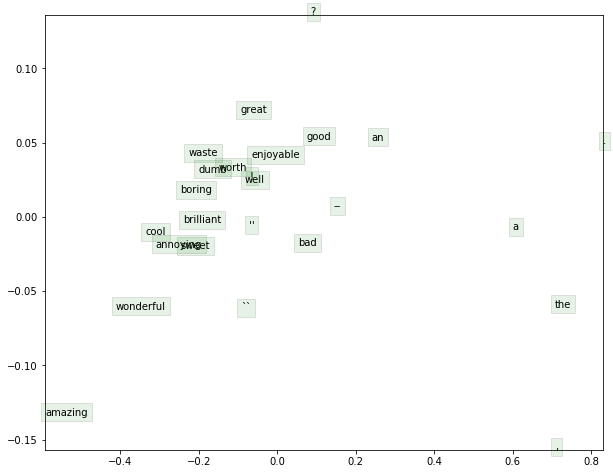

In [18]:

# Visualize the word vectors you trained
_, wordVectors0, _ = load_saved_params()
wordVectors = (wordVectors0[:nWords,:] + wordVectors0[nWords:,:])
visualizeWords = ["the", "a", "an", ",", ".", "?", "!", "``", "''", "--", "good", "great", "cool", "brilliant", 
                  "wonderful", "well", "amazing","worth", "sweet", "enjoyable", "boring", "bad", "waste", 
                  "dumb", "annoying"]
visualizeIdx = [tokens[word] for word in visualizeWords]
visualizeVecs = wordVectors[visualizeIdx, :]
temp = (visualizeVecs - np.mean(visualizeVecs, axis=0))
covariance = 1.0 / len(visualizeIdx) * temp.T.dot(temp)
U,S,V = np.linalg.svd(covariance)
coord = temp.dot(U[:,0:2]) 

for i in range(len(visualizeWords)):
    plt.text(coord[i,0], coord[i,1], visualizeWords[i], bbox=dict(facecolor='green', alpha=0.1))
    
plt.xlim((np.min(coord[:,0]), np.max(coord[:,0])))
plt.ylim((np.min(coord[:,1]), np.max(coord[:,1])))
